<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/LassoRegression_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

อ้างอิง : https://www.youtube.com/watch?v=KYHSMcP72A0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [4]:
#library
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split


##slope

In [5]:
# Preview
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['Slopes']

# X and y values
X = features.values
y = target.values

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
features.shape

(52620, 70)

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

search = GridSearchCV(
    estimator=pipeline,
    param_grid={'model__alpha': np.arange(0.1, 3, 0.1)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=3
)
search.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ................model__alpha=0.1;, score=-89.134 total time=   0.1s
[CV 2/5] END ................model__alpha=0.1;, score=-88.780 total time=   0.1s
[CV 3/5] END ................model__alpha=0.1;, score=-93.405 total time=   0.1s
[CV 4/5] END ................model__alpha=0.1;, score=-91.428 total time=   0.2s
[CV 5/5] END ................model__alpha=0.1;, score=-90.212 total time=   0.2s
[CV 1/5] END ................model__alpha=0.2;, score=-89.656 total time=   0.2s
[CV 2/5] END ................model__alpha=0.2;, score=-89.020 total time=   0.1s
[CV 3/5] END ................model__alpha=0.2;, score=-93.817 total time=   0.1s
[CV 4/5] END ................model__alpha=0.2;, score=-90.807 total time=   0.1s
[CV 5/5] END ................model__alpha=0.2;, score=-90.681 total time=   0.1s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-90.218 total time=   0.1s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [7]:
search.best_params_

{'model__alpha': 0.1}

In [8]:
coef = search.best_estimator_[1].coef_
coef

array([ 3.63417369e-01,  3.52940794e-01, -0.00000000e+00, -0.00000000e+00,
        1.60464032e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.86277262e-02, -0.00000000e+00, -0.00000000e+00,
       -2.82706086e-02, -0.00000000e+00, -5.13538542e-02, -0.00000000e+00,
       -0.00000000e+00,  1.34502268e-01,  1.44325708e-02,  1.32570281e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.58408592e-03, -0.00000000e+00, -0.00000000e+00, -1.95967641e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.61166161e-03,  0.00000000e+00,
        0.00000000e+00, -4.59620406e-02, -0.00000000e+00,  6.16695676e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.26462204e-02, -0.00000000e+00, -0.00000000e+00,
        2.66833430e-02, -0.00000000e+00,  7.80943378e-01, -0.00000000e+00,
        0.00000000e+00, -

features ที่ถูกเลือกมาโดยโมเดล ที่มี taget เป็น slope

In [9]:
selected_features_slope = np.array(features.columns)[coef != 0]
selected_features_slope

array(['Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G4M2-Febuxostat',
       'G5M1-Ketoanalog-amino-acid', 'D1-Hypertension', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L6-Chloride', 'L7-Bicarbonate',
       'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L15-Platelet',
       'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio'], dtype=object)

In [10]:
selected_features_slope .shape

(28,)

In [11]:
## np.array(features.columns)[coef != 0]
#ดู feature ที่ไม่ถูกเลือก

##eGFR

In [12]:
# Preview
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['L1-eGFR']

# X and y values
X = features.values
y = target.values

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])
search = GridSearchCV(
    estimator=pipeline,
    param_grid={'model__alpha': np.arange(0.1, 3, 0.1)},
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=3
)
search.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ...............model__alpha=0.1;, score=-127.987 total time=   0.2s
[CV 2/5] END ...............model__alpha=0.1;, score=-137.162 total time=   0.2s
[CV 3/5] END ...............model__alpha=0.1;, score=-138.779 total time=   0.3s
[CV 4/5] END ...............model__alpha=0.1;, score=-131.935 total time=   0.4s
[CV 5/5] END ...............model__alpha=0.1;, score=-126.916 total time=   0.4s
[CV 1/5] END ...............model__alpha=0.2;, score=-128.994 total time=   0.3s
[CV 2/5] END ...............model__alpha=0.2;, score=-135.987 total time=   0.3s
[CV 3/5] END ...............model__alpha=0.2;, score=-139.676 total time=   0.4s
[CV 4/5] END ...............model__alpha=0.2;, score=-132.667 total time=   0.4s
[CV 5/5] END ...............model__alpha=0.2;, score=-127.828 total time=   0.3s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-130.403 total time=   0.3s
[CV 2/5] END model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
search.best_params_

{'model__alpha': 0.1}

In [15]:
coef = search.best_estimator_[1].coef_
coef

array([-3.60694211,  0.73025585, -0.43312531,  0.        , -1.24781015,
        0.01692943,  0.16534373, -0.30165362,  0.39018269,  0.426454  ,
       -0.        , -0.54203024,  0.1208992 ,  0.65857768,  1.21920555,
       -0.44719409, -0.        , -0.21996483, -0.        , -0.50667048,
       -0.40899669, -0.22678447, -0.        , -0.03050562, -0.31772352,
       -0.02876557, -0.37178976, -0.23493698,  0.        , -0.02970766,
        0.01036098,  0.        , -0.        , -0.        , -0.        ,
       -0.31464979, -0.        ,  0.02613082,  0.        ,  0.03805904,
        0.        ,  0.        ,  0.16162163, -0.        ,  0.04872293,
        0.        ,  0.01927398,  0.05278397,  0.        ,  0.        ,
       -8.0353544 ,  0.03909021, -0.        , -0.        ,  0.21299342,
       -5.81975197, -0.55708846,  1.04845646,  0.        ,  1.0714794 ,
        0.659299  ,  0.51644865,  0.29752012,  0.43274027,  0.3291219 ,
        0.        ,  0.46419403,  0.46827328, -0.31318393,  0.62

features ที่ถูกเลือกมาโดยโมเดล ที่มี taget เป็น eGFR

In [16]:
selected_features_egfr = np.array(features.columns)[coef != 0]
selected_features_egfr

array(['Age', 'InPatient', 'OutPatient', 'Sex', 'NATNL', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI',
       'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G3M3-Fibrate',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G4M3-Uricosuric-agent', 'BMI', 'D2-Diabetes-mellitus', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN',
       'L4-Sodium', 'L7-Bicarbonate', 'L8-Uric', 'L9-Calcium',
       'L10-Phosphorus', 'L12-Hemoglobin', 'L13-Hematocrit', 'L14-WBC',
       'L15-Platelet', 'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio'], dtype=object)

In [17]:
selected_features_egfr .shape

(48,)

##PCA

 Feature Importance โดยใช้วิธี Lasso Regression  จากทั้งหมด 70 feature ได้ผลดังนี้
1. ตาม slope มี 28 feature ได้แก่
       'Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G4M2-Febuxostat',
       'G5M1-Ketoanalog-amino-acid', 'D1-Hypertension', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L6-Chloride', 'L7-Bicarbonate',
       'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L15-Platelet',
       'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio'
2. ตาม eGFR มี 48 feature ได้แก่
       'Age', 'InPatient', 'OutPatient', 'Sex', 'NATNL', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI',
       'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G3M3-Fibrate',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G4M3-Uricosuric-agent', 'BMI', 'D2-Diabetes-mellitus', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN',
       'L4-Sodium', 'L7-Bicarbonate', 'L8-Uric', 'L9-Calcium',
       'L10-Phosphorus', 'L12-Hemoglobin', 'L13-Hematocrit', 'L14-WBC',
       'L15-Platelet', 'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio'
3. ทำการรวม feature importance ของ slope กับ eGFR ได้ 53 feature ดังนี้
       'Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G4M2-Febuxostat', 'G5M1-Ketoanalog-amino-acid', 'D1-Hypertension',
       'D4-SLE', 'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L6-Chloride', 'L7-Bicarbonate',
       'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L15-Platelet',
       'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio', 'OutPatient',
       'NATNL', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M3-Dihydropyridine-CCB', 'G1M1-ACEI', 'G2M3-DPP4-inhibitor',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M4-TZD', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G4M3-Uricosuric-agent', 'BMI',
       'D2-Diabetes-mellitus', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L4-Sodium',
       'L12-Hemoglobin', 'L13-Hematocrit', 'L14-WBC', 'L24-HDL-Cholesterol'

In [19]:
#คอลัมน์ที่ได้จากการหา Feature Importance ของ slope 28 feature มาใช้ในการทำ PCA
slope = [ 'Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G4M2-Febuxostat',
       'G5M1-Ketoanalog-amino-acid', 'D1-Hypertension', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L6-Chloride', 'L7-Bicarbonate',
       'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L15-Platelet',
       'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio']
slope = df[slope]
slope.head()

,Age,InPatient,Sex,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G2M5-SGLT2i,G4M1-Allopurinol,G4M2-Febuxostat,...,L7-Bicarbonate,L8-Uric,L9-Calcium,L10-Phosphorus,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,73,0,1,0,0,0,0,0,0,0,...,26.747,4.515,9.655,3.411,195.63,91.0,5.400,81.0,123.0,57.671
1,74,0,1,0,0,0,0,0,0,0,...,26.350,3.800,9.636,4.004,267.72,86.0,5.567,64.0,146.0,146.106
2,75,0,1,0,0,0,0,0,0,0,...,29.700,4.192,8.860,3.338,313.00,100.0,5.300,62.0,129.0,50.831
3,76,0,1,35,0,0,0,0,0,0,...,26.711,4.922,9.265,3.417,199.66,89.0,5.292,69.0,139.0,121.937
4,78,0,1,0,0,0,0,0,0,0,...,27.200,5.423,9.272,4.025,434.00,88.0,5.500,74.0,129.0,41.564


In [20]:
#ใช้คอลัมน์ที่ได้จากการหา Feature Importance ของ eGFR 48 feature มาใช้ในการทำ PCA
egfr = ['Age', 'InPatient', 'OutPatient', 'Sex', 'NATNL', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI',
       'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G3M3-Fibrate',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G4M3-Uricosuric-agent', 'BMI', 'D2-Diabetes-mellitus', 'D4-SLE',
       'D6-Rheumatoid-arthritis', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L2-BUN',
       'L4-Sodium', 'L7-Bicarbonate', 'L8-Uric', 'L9-Calcium',
       'L10-Phosphorus', 'L12-Hemoglobin', 'L13-Hematocrit', 'L14-WBC',
       'L15-Platelet', 'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
egfr = df[egfr]
egfr.head()

,Age,InPatient,OutPatient,Sex,NATNL,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M3-Dihydropyridine-CCB,...,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,73,0,1,1,0,90,0,0,0,0,...,13.582,41.678,4.9104,195.63,91.0,5.400,81.0,123.0,99.0,57.671
1,74,0,1,1,0,90,90,0,0,0,...,13.561,41.409,5.6073,267.72,86.0,5.567,64.0,146.0,73.0,146.106
2,75,0,1,1,0,100,100,34,0,0,...,10.100,32.400,9.4100,313.00,100.0,5.300,62.0,129.0,65.0,50.831
3,76,0,1,1,0,35,0,1,35,0,...,13.513,41.351,5.2678,199.66,89.0,5.292,69.0,139.0,76.0,121.937
4,78,0,1,1,0,100,0,15,0,0,...,10.700,34.600,5.4200,434.00,88.0,5.500,74.0,129.0,60.0,41.564


In [28]:
# หาคอลัมน์ที่ซ้ำกัน
common_columns = list(set(slope.columns).intersection(egfr.columns))
len(common_columns)


23

In [30]:
# หาคอลัมน์ที่ไม่ซ้ำกันใน slope
unique_columns_slope = list(set(slope.columns).difference(common_columns))
len(unique_columns_slope)

5

In [31]:
# หาคอลัมน์ที่ไม่ซ้ำกันใน egfr
unique_columns_egfr = list(set(egfr.columns).difference(common_columns))
len(unique_columns_egfr)

25

In [33]:
# นำคอลัมน์ทั้งหมดมารวมกัน
selected_features = common_columns + unique_columns_slope + unique_columns_egfr

# ลำดับคอลัมน์ตาม slope
slope_columns_order = slope.columns.tolist()

# ลำดับคอลัมน์ตาม egfr
egfr_columns_order = egfr.columns.tolist()

# นำคอลัมน์ทั้งหมดมารวมกัน โดยให้ลำดับตาม slope แล้ว egfr
selected_features_order = slope_columns_order + [col for col in egfr_columns_order if col not in slope_columns_order]

# สร้าง DataFrame ที่มีเฉพาะ feature ที่เลือกและเรียงลำดับตามลำดับที่กำหนด
data = df[selected_features_order]
data.head()


,Age,InPatient,Sex,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G2M5-SGLT2i,G4M1-Allopurinol,G4M2-Febuxostat,...,D2-Diabetes-mellitus,D9-HCV-infection,D11-Heart-failure,D13-Kidney-stone,D14-Valvular-heart-disease,L4-Sodium,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L24-HDL-Cholesterol
0,73,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,141.95,13.582,41.678,4.9104,99.0
1,74,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,141.04,13.561,41.409,5.6073,73.0
2,75,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,143.00,10.100,32.400,9.4100,65.0
3,76,0,1,35,0,0,0,0,0,0,...,1,0,0,0,0,141.70,13.513,41.351,5.2678,76.0
4,78,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,141.00,10.700,34.600,5.4200,60.0


In [35]:
#รวม feature importance ของ slope กับ eGFR ได้ 53 คอลัมน์
# catagory [InPatient, Sex, OutPatient, NATNL]
data.columns

Index(['Age', 'InPatient', 'Sex', 'G1M5-Diuretic', 'G1M6-MRA',
       'G2M2-Metformin', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G4M2-Febuxostat', 'G5M1-Ketoanalog-amino-acid', 'D1-Hypertension',
       'D4-SLE', 'D6-Rheumatoid-arthritis', 'D12-Thalassemia',
       'D15-Solid-malignancy', 'L2-BUN', 'L6-Chloride', 'L7-Bicarbonate',
       'L8-Uric', 'L9-Calcium', 'L10-Phosphorus', 'L15-Platelet',
       'L19-Blood-sugar', 'L20-HbA1c', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L28-UrineProtein-Cr-ratio', 'OutPatient',
       'NATNL', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M3-Dihydropyridine-CCB', 'G1M1-ACEI', 'G2M3-DPP4-inhibitor',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M4-TZD', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G4M3-Uricosuric-agent', 'BMI',
       'D2-Diabetes-mellitus', 'D9-HCV-infection', 'D11-Heart-failure',
       'D13-Kidney-stone', 'D14-Valvular-heart-disease', 'L4-Sodium',
       'L12-Hemoglobin', 'L13-

เริ่มทำ PCA

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# สร้าง StandardScaler
scaler = StandardScaler()

# นำข้อมูลมาทำการ scale
# คอลัมน์ที่ไม่ต้องการทำ scaling ถูกนำออก
columns_to_exclude = ['InPatient', 'Sex', 'OutPatient', 'NATNL']  # แก้ไขให้เป็นรายชื่อคอลัมน์เดี่ยว
data_to_scale = data.drop(columns=columns_to_exclude)
scale_data = scaler.fit_transform(data_to_scale)

# นำข้อมูลที่ถูก scale แล้วไปใส่ใน DataFrame ใหม่
scale_data = pd.DataFrame(scale_data, columns=data_to_scale.columns)
scale_data[['InPatient', 'Sex', 'OutPatient', 'NATNL']] = data[['InPatient', 'Sex', 'OutPatient', 'NATNL']]
scale_data


,Age,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G2M5-SGLT2i,G4M1-Allopurinol,G4M2-Febuxostat,G5M1-Ketoanalog-amino-acid,D1-Hypertension,...,D14-Valvular-heart-disease,L4-Sodium,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L24-HDL-Cholesterol,InPatient,Sex,OutPatient,NATNL
0,0.531249,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,0.741235,0.672288,0.704456,-0.794095,3.930974,0,1,1,0
1,0.617111,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,0.438126,0.659805,0.651083,-0.564822,1.766080,0,1,1,0
2,0.702974,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,1.090976,-1.397360,-1.136428,0.686231,1.099958,0,1,1,0
3,0.788837,2.205286,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,0.657963,0.631275,0.639575,-0.676514,2.015875,0,1,1,0
4,0.960563,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,1.373740,...,-0.093814,0.424803,-1.040729,-0.699918,-0.626442,0.683633,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.327380,-0.176477,-0.093112,2.69524,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,1.373740,...,-0.093814,0.757889,0.907664,0.788187,0.985613,-0.731875,0,0,1,0
52616,0.359523,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,4.541581,-0.05281,-0.062733,1.373740,...,-0.093814,0.757889,0.357858,0.490566,0.735580,-0.815140,0,1,1,0
52617,-0.069792,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,-2.572980,-0.377990,-0.620552,-0.892924,-1.564527,0,0,0,0
52618,0.016071,-0.176477,-0.093112,-0.40824,-0.102122,-0.112449,-0.236884,-0.05281,-0.062733,-0.518024,...,-0.093814,-0.574458,0.148040,0.173104,0.696101,0.235666,0,0,1,0


In [42]:
scale_data.describe().round(2)

,Age,G1M5-Diuretic,G1M6-MRA,G2M2-Metformin,G3M3-Fibrate,G2M5-SGLT2i,G4M1-Allopurinol,G4M2-Febuxostat,G5M1-Ketoanalog-amino-acid,D1-Hypertension,...,D14-Valvular-heart-disease,L4-Sodium,L12-Hemoglobin,L13-Hematocrit,L14-WBC,L24-HDL-Cholesterol,InPatient,Sex,OutPatient,NATNL
count,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,...,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.09,0.48,0.87,0.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.28,0.50,0.34,0.17
min,-4.19,-0.18,-0.09,-0.41,-0.10,-0.11,-0.24,-0.05,-0.06,-0.52,...,-0.09,-11.23,-7.40,-7.57,-2.41,-3.98,0.00,0.00,0.00,0.00
25%,-0.58,-0.18,-0.09,-0.41,-0.10,-0.11,-0.24,-0.05,-0.06,-0.52,...,-0.09,-0.24,-0.59,-0.56,-0.44,-0.53,0.00,0.00,1.00,0.00
50%,0.02,-0.18,-0.09,-0.41,-0.10,-0.11,-0.24,-0.05,-0.06,-0.52,...,-0.09,0.20,0.07,0.09,-0.12,-0.05,0.00,0.00,1.00,0.00
75%,0.70,-0.18,-0.09,-0.41,-0.10,-0.11,-0.24,-0.05,-0.06,-0.52,...,-0.09,0.50,0.70,0.68,0.27,0.40,0.00,1.00,1.00,0.00
max,3.02,16.97,26.48,9.37,25.48,18.66,11.80,24.21,19.68,7.05,...,21.14,5.42,5.91,5.73,95.27,12.01,1.00,1.00,1.00,3.00


In [45]:
pca = PCA() #ไม่ได้กำหนดจำนวน components ที่ต้องการ
pca.fit_transform(scale_data)

print(f'explained_variance  = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio  = {pca.explained_variance_ratio_}') #แต่ละ component อธิบาย varience ได้เท่าไหร่
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')


explained_variance  = [3.3775099  3.25539996 2.38670407 2.05711094 1.67080672 1.37565681
 1.27739998 1.26473383 1.12818163 1.11669584 1.09167604 1.06602231
 1.04688215 1.04217989 1.0278857  1.02256969 1.01060729 1.00403716
 1.00133405 0.99682959 0.9874474  0.9814075  0.9710099  0.96228719
 0.95932878 0.94374336 0.93630418 0.91988335 0.88776832 0.88617126
 0.86918598 0.84214466 0.8022399  0.78229665 0.77238691 0.73129764
 0.69838486 0.6768232  0.60365943 0.59190767 0.55377696 0.52170012
 0.48427986 0.45882278 0.39188304 0.3499522  0.19772301 0.14811116
 0.13313042 0.12802901 0.03382714 0.02825199 0.01775706]
explained_variance_ratio  = [0.06826956 0.06580135 0.04824242 0.04158035 0.03377199 0.02780613
 0.02582007 0.02556405 0.02280392 0.02257176 0.02206603 0.02154749
 0.02116061 0.02106557 0.02077664 0.02066919 0.02042739 0.02029459
 0.02023995 0.0201489  0.01995926 0.01983718 0.01962701 0.0194507
 0.0193909  0.01907587 0.0189255  0.01859359 0.01794445 0.01791217
 0.01756884 0.01702226 

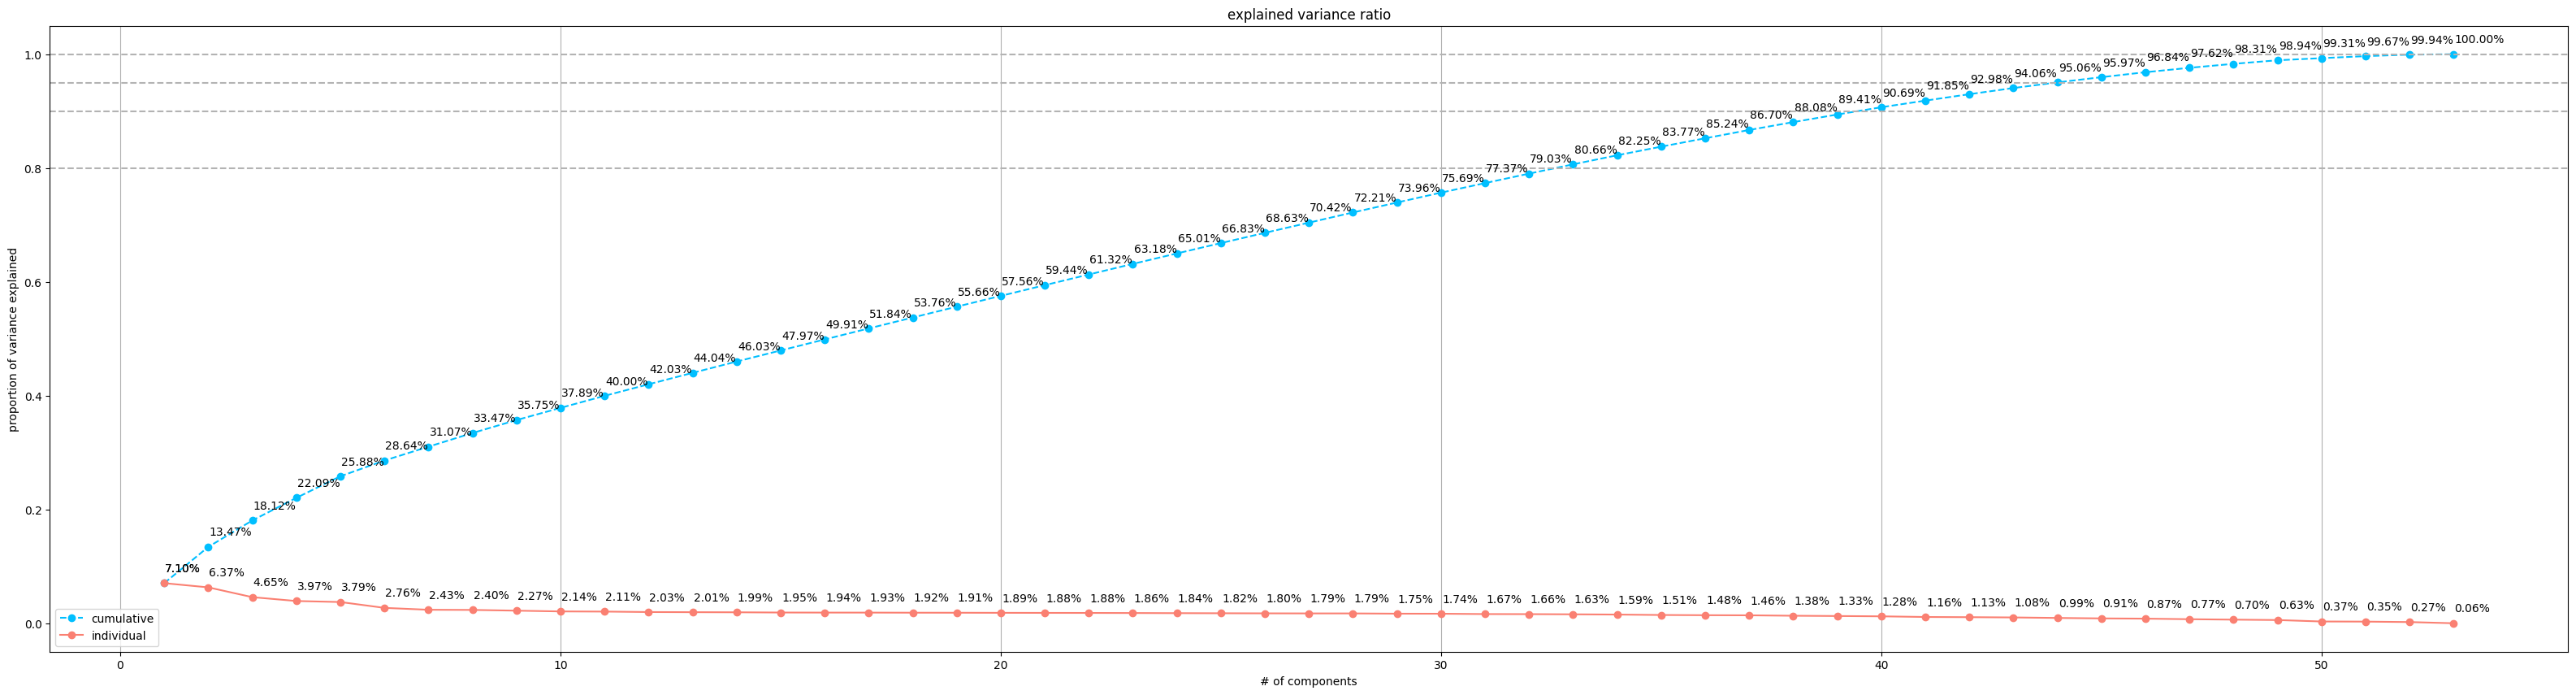

In [48]:
# ในส่วนที่ทำ Scree Plot
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(40, 10)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker='o', label='cumulative', color='deepskyblue')

    plt.plot(x, y1, linestyle='-', marker='o', label='individual', color='salmon')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
            plt.text(n + .02, v + .02, f'{v * 100:.2f}%', fontsize=10)
            if with_cumulative:
                plt.text(n + .02, cv + .02, f'{cv * 100:.2f}%', fontsize=10)

    plt.show()
scree_plot(scale_data, n_components=53, with_cumulative=True, show_data_label=True)



PCA จะพิจารณาที่ 90-95 % ขึ้นไป (อ้างอิง: กอบเกียรติ สระอุบล, เรียนรู้ Data Science และ AI:Machine learning ด้วย python (2563 ) หากเลือกที่ 40 componant จะอธิบายข้อมูลได้ 90.69 % (จะเอามากกว่านี้ก็ได้)

In [52]:
pca.components_ # Eigenvectors

array([[ 7.09682984e-04,  8.96668090e-02,  3.78667349e-03, ...,
        -1.06273062e-02,  1.36269474e-02, -3.82285359e-05],
       [ 1.87210521e-02, -1.64121314e-02,  1.49680630e-02, ...,
         3.43053569e-02, -8.42772545e-02,  4.76511255e-04],
       [-2.51597293e-01, -3.54487067e-02, -1.09336005e-02, ...,
        -6.82322034e-02, -1.99410861e-03,  1.43793046e-03],
       ...,
       [ 8.91096883e-03, -5.93934184e-04,  1.62836835e-03, ...,
        -5.03702662e-02, -3.33568018e-02, -6.51207951e-03],
       [-5.09698463e-03,  1.25119539e-03, -1.21171582e-03, ...,
         7.71453419e-03,  2.98645056e-03,  9.99864985e-01],
       [-1.30938657e-02,  2.80951919e-03,  2.44803613e-03, ...,
        -2.74467926e-02, -6.46924585e-01,  1.04997247e-03]])

In [53]:

# ให้ features ของ scale_data เป็น index
dpc = pd.DataFrame(pca.components_.T,
                   index=scale_data.columns,
                   columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)

# ทำการแปลงข้อมูลให้เป็น DataFrame ที่มีขนาดเล็กขึ้น (ในที่นี้เลือก 5 แถวแรก)
dpc_small = dpc.iloc[:27, :]
dpc_small.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
Age,0.000700,0.018700,-0.251600,-0.103100,-0.056700,-0.017900,0.168400,0.202900,-0.316300,-0.231300,0.083400,-0.053800,0.059900,0.127300,0.098900,0.065000,-0.088000,0.040600,0.007300,-0.053400,0.088700,0.047300,0.023500,0.028200,-0.217700,-0.098300,0.100300,-0.009900,-0.012400,-0.066100,-0.025200,0.391800,-0.263000,-0.252600,0.078500,-0.196600,0.404400,-0.190100,0.002700,-0.099300,-0.099000,-0.002400,-0.014800,-0.081100,0.022200,-0.020900,-0.018100,0.010800,0.004700,0.015800,0.008900,-0.005100,-0.013100
G1M5-Diuretic,0.089700,-0.016400,-0.035400,0.034300,-0.026600,-0.103800,0.145500,0.354400,0.411600,-0.266200,0.118100,-0.045900,0.140800,0.007700,-0.043900,0.066900,-0.014500,-0.032600,-0.043600,0.014600,0.045700,0.023200,0.133900,0.107600,0.003800,-0.136400,-0.013600,-0.200900,0.042300,-0.135100,-0.272400,0.070900,0.453300,0.298200,-0.047400,-0.010000,0.065000,-0.204700,-0.082300,-0.029400,-0.004100,0.002200,0.013600,-0.049000,0.000700,0.018400,0.006400,0.026000,-0.012500,0.004100,-0.000600,0.001300,0.002800
G1M6-MRA,0.003800,0.015000,-0.010900,-0.004800,-0.098100,-0.023000,-0.011400,0.219600,0.465500,-0.283200,-0.015000,-0.038600,0.025000,-0.050600,-0.137300,-0.031300,-0.021200,-0.083100,-0.233000,-0.007500,-0.138900,-0.058800,0.198100,-0.104200,0.039200,0.162500,0.147600,0.439400,-0.125200,0.263600,0.255400,-0.031500,-0.266600,-0.099800,0.056300,-0.045200,-0.002100,-0.029600,0.039200,0.011600,-0.024000,-0.002400,0.002600,0.011700,0.026400,-0.001100,-0.003200,-0.015200,-0.013900,0.000000,0.001600,-0.001200,0.002400
G2M2-Metformin,0.329800,-0.138400,-0.038500,-0.185900,0.062900,0.179000,0.026600,0.149900,0.038000,0.090200,-0.001300,0.024100,-0.070700,-0.033800,-0.016200,0.004100,0.031700,0.013200,0.014000,-0.009800,-0.005600,-0.041000,-0.063500,0.035600,0.037900,0.052500,-0.046200,-0.018800,0.091200,0.019100,-0.113900,-0.095100,-0.121900,-0.028700,-0.080800,0.033800,-0.139700,-0.069000,0.177800,-0.072100,-0.151600,0.335300,-0.545000,-0.353500,0.167200,-0.208200,0.029700,0.000500,0.003800,-0.019000,0.003600,0.001500,0.001000
G3M3-Fibrate,0.072300,-0.049400,0.043300,0.006000,0.034900,0.138900,0.125400,-0.202100,0.129200,-0.165100,-0.324600,-0.274700,0.032700,0.099200,-0.130100,0.062500,-0.066100,0.130400,0.164800,-0.090500,-0.129300,0.087000,-0.165600,-0.087700,0.338900,-0.203700,-0.160700,-0.067900,0.063900,0.417200,-0.200200,0.291400,0.045500,-0.169800,0.035900,-0.049700,-0.032200,0.029900,0.004500,0.045300,-0.050000,-0.056300,-0.015700,0.034800,-0.065700,0.020900,-0.002300,-0.011200,0.004700,-0.003200,0.000500,0.000100,-0.000600
G2M5-SGLT2i,0.186300,-0.066100,-0.054900,-0.089000,0.020900,0.195100,-0.384700,-0.079400,0.090600,-0.002200,0.014700,0.076600,0.165200,0.073400,-0.002500,0.045500,-0.001300,-0.072300,-0.001100,-0.011700,-0.047100,0.051600,0.158800,0.037500,-0.051900,-0.162800,0.105000,0.022700,-0.073600,-0.189300,0.114500,0.002300,0.327800,-0.500000,-0.058800,-0.224000,-0.052000,0.147300,-0.299500,0.169400,-0.114000,0.083900,-0.027400,0.001900,-0.025500,0.014500,0.023600,-0.003500,0.002300,0.000000,-0.000300,0.000800,-0.000300
G4M1-Allopurinol,0.076000,-0.084700,-0.059000,0.110500,-0.189400,-0.153100,0.222200,-0.122300,-0.051400,-0.039500,-0.217100,0.239900,0.131200,-0.108600,0.056400,-0.038900,0.111100,0.061000,0.042800,0.032900,-0.046000,0.167700,-0.132900,0.062000,0.017900,-0.179400,0.059100,0.438700,-0.405100,-0.177000,-0.185000,-0.012800,0.151700,0.066300,0.053500,0.046000,0.103700,0.273000,0.125600,-0.069500,-0.077800,0.008200,-0.064800,-0.146400,-0.056600,-0.024600,-0.015900,-0.020900,0.018400,-0.037300,-0.002400,0.000700,0.001100
G4M2-Febuxostat,0.012300,-0.017600,-0.012700,0.014000,-0.038400,-0.033300,-0.004300,-0.141400,-0.041100,-0.046800,-0.080700,0.0233

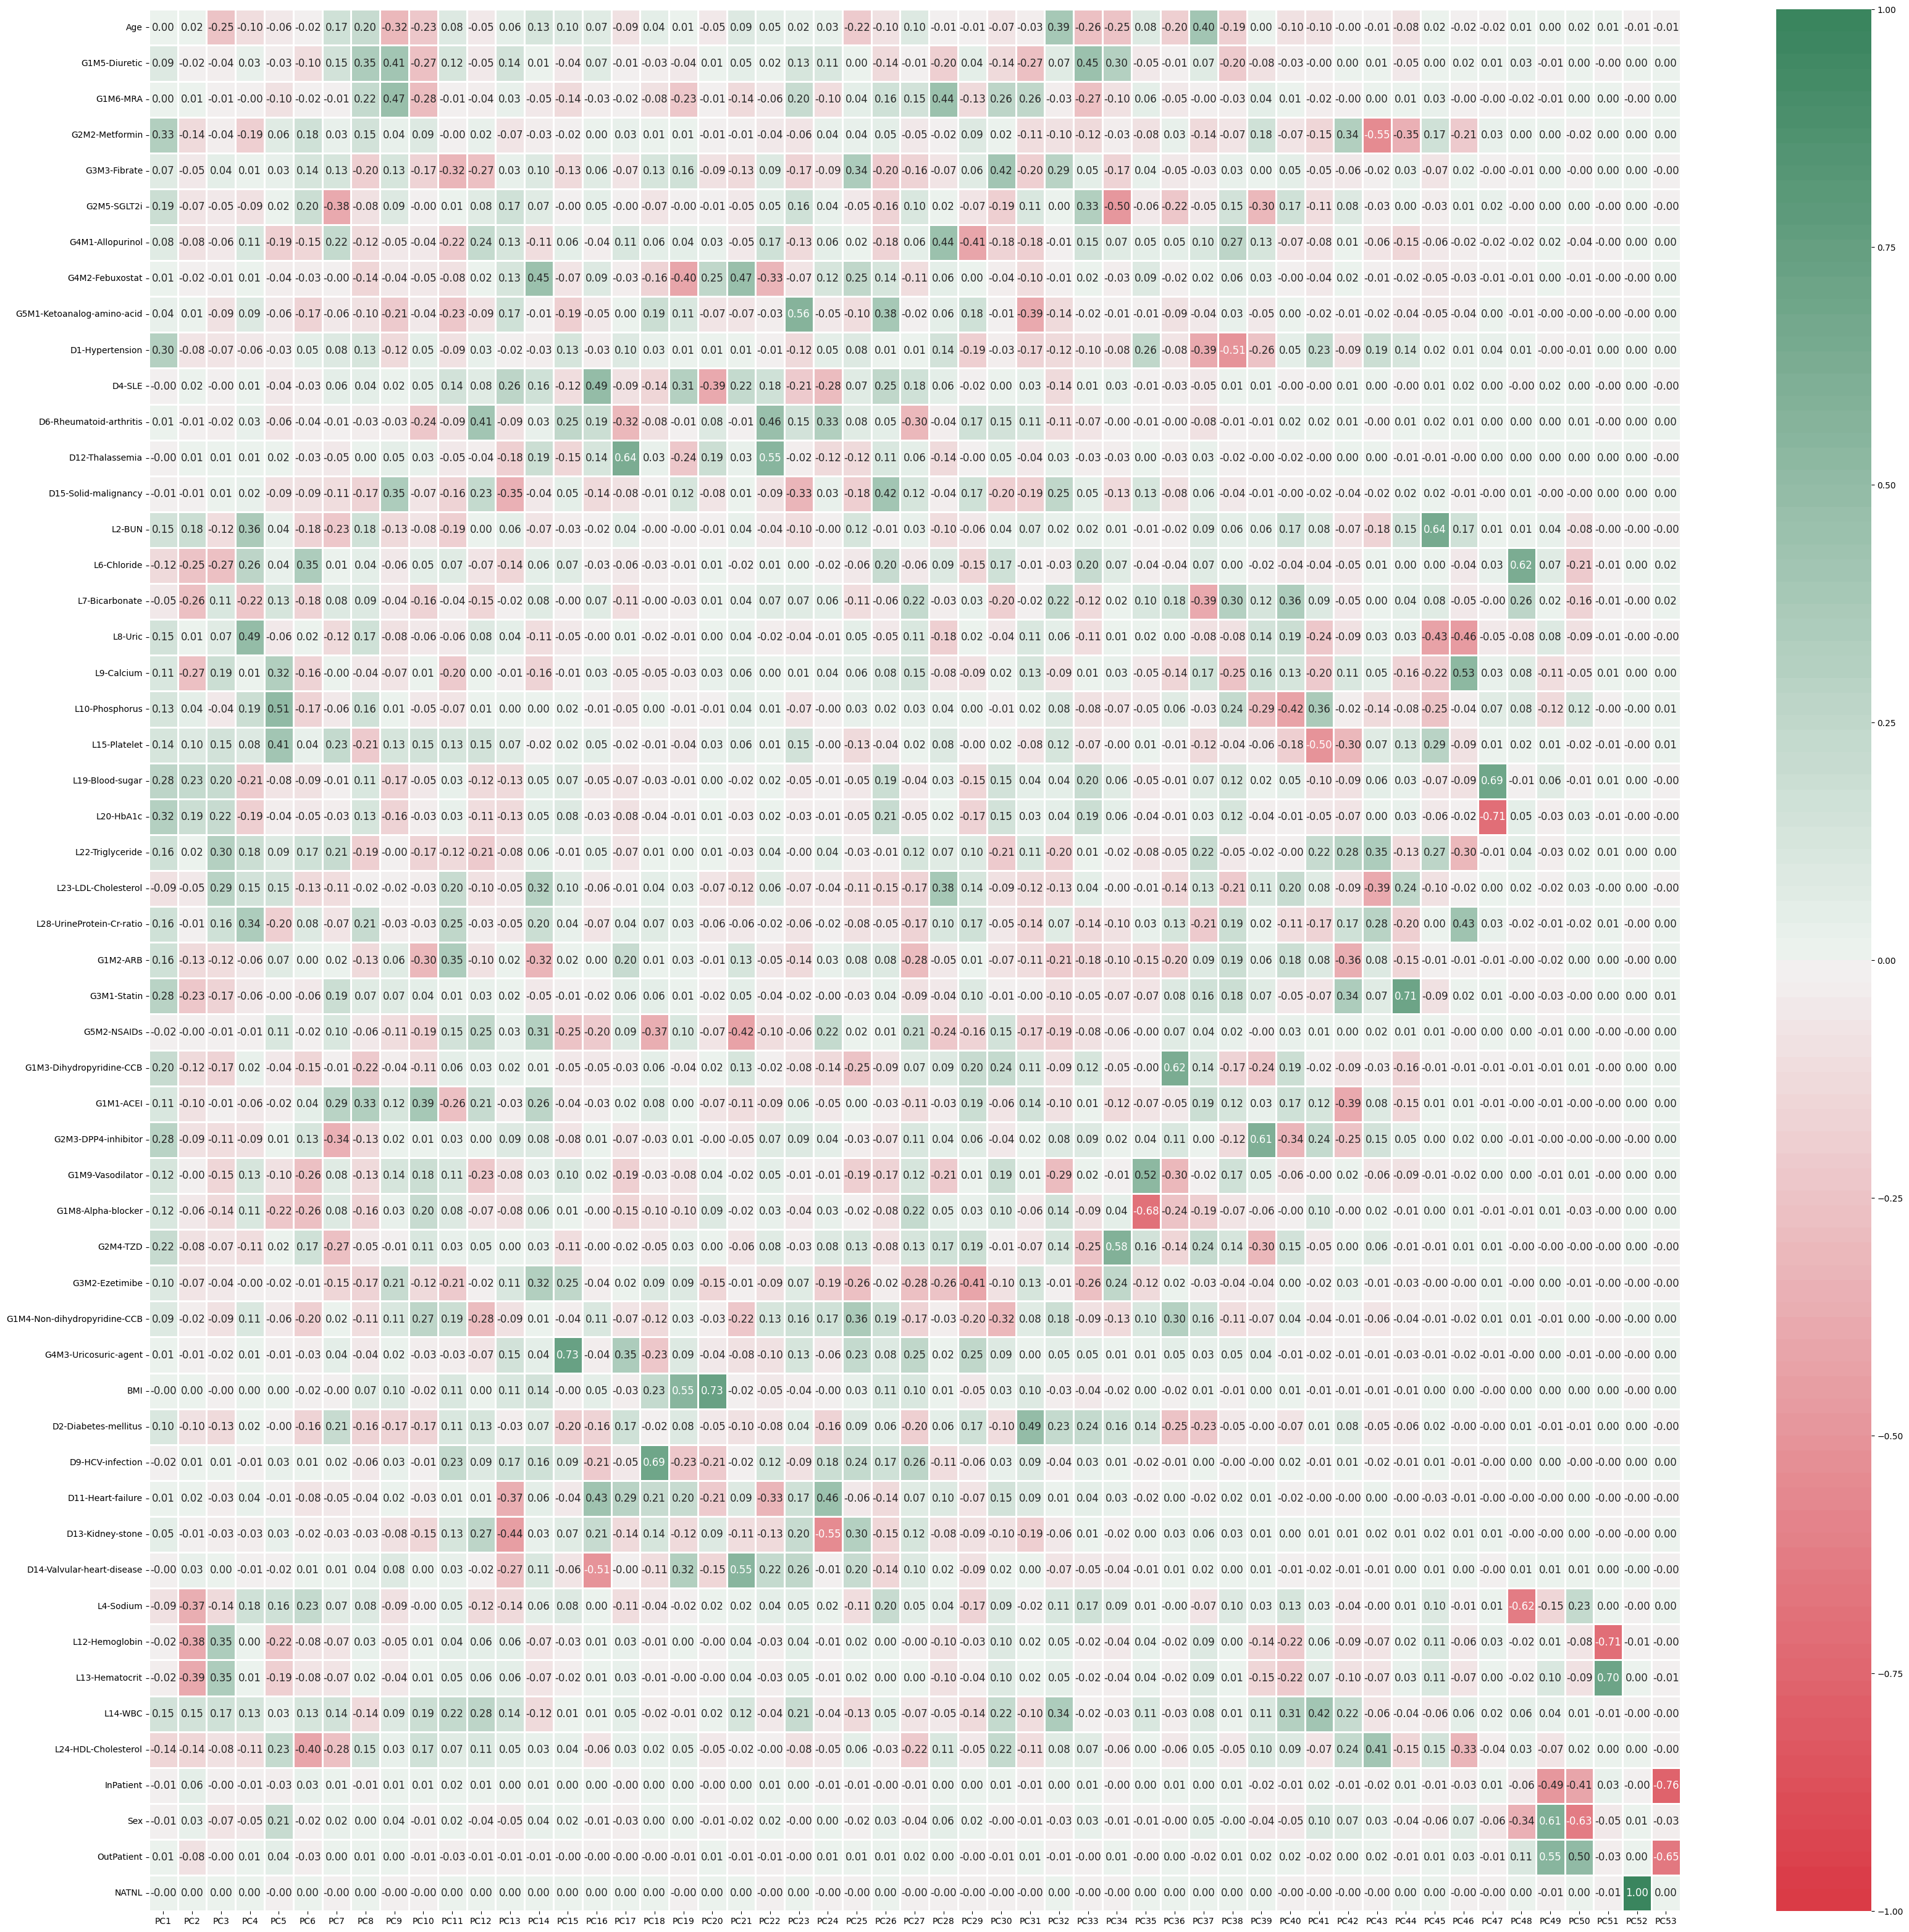

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dpc is your DataFrame
# If not, replace dpc with your DataFrame variable
# If you want to use the existing 'ax' and 'fig', you can omit these lines
fig, ax = plt.subplots(figsize=(40, 40))

# Assuming dpc is your DataFrame
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1,
            center=0, annot=True, vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 12}, ax=ax)

plt.show()
